In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seqm
plt.style.use('dark_background')

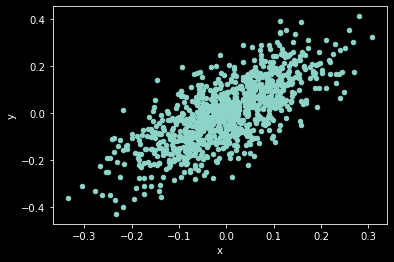

,x,y
2000-01-01,-0.091412,-0.003875
2000-01-02,0.029554,0.114502
2000-01-03,0.129677,0.171587
2000-01-04,-0.060457,-0.032754
2000-01-05,0.090485,-0.072917
...,...,...
2002-09-22,-0.012453,0.248470
2002-09-23,0.189466,0.205930
2002-09-24,0.035687,0.140764
2002-09-25,-0.005111,0.161415


In [7]:

# create a dataset
n = 1000
s = 0.1
x = np.random.normal(0, s, n)
y = np.random.normal(x, s, n)

data = pd.DataFrame()
data['x'] = x
data['y'] = y
data.index = pd.date_range('2000-01-01', periods = n, freq = 'D')
data.plot.scatter('x','y')
plt.show()
data

In [9]:
# create dataset object
dataset = seqm.Dataset({'data' : data})

In [11]:
# create model pipe
model_pipes = seqm.ModelPipes()
for key in dataset.keys():
    # instantiate a model
    # ConditionalGaussian: lin reg
    # GaussianHMM
    # ConditionalGaussianHMM
    model = seqm.ConditionalGaussian(kelly_std=2, max_w=1)
    # create a pipe for data
    model_pipe_ = seqm.ModelPipe(model = model)
    # store pipe in pipes
    model_pipes[key] = model_pipe_

In [12]:
paths=dataset.cvbt(
                model_pipes = model_pipes, 
                k_folds = 4, 
                seq_path = False, 
                start_fold = 0, 
                n_paths = 10, 
                burn_fraction = 0.1, 
                min_burn_points = 3 
                )

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 15.28it/s]


In [ ]:
seqm.post_process(paths)
